The [Identification Quality Experiment](https://www.inaturalist.org/pages/identification_quality_experiment) was an experiment Scott ran in spring of 2017 to try and get a handle on how accurate iNat identifications are. He assembled about 30 experts, most of whom had professional biodiversity credentials (e.g. masters degrees and above) and most of whom were iNat users, and asked them to use a [modified version of our Identify interface](inaturalist.org/observations/identify?blind) that prevented them from seeing the identity of the observer and any other identifications that had been added. These experts added 4000+ identifications.

This notebook attempts to re-analyze the results based on an export of these identifications from October of 2019.

In [30]:
# First we'll get libraries imported and read in the data
import pandas as pd
df = pd.read_csv("identifications-20191002.csv")
df

,taxon_id,taxon_name,taxon_iconic_taxon_name,taxon_rank,taxon_rank_level,taxon_ancestry,prev_obs_taxon_id,prev_obs_taxon_name,prev_obs_taxon_iconic_taxon_name,prev_obs_taxon_rank,prev_obs_taxon_rank_level,prev_obs_taxon_ancestry,obs_had_species_cid,more_conservative,disagreement,exact_agreement,more_specific_agreement
0,26575,Diadophis punctatus,Reptilia,species,10.0,48460/1/2/355675/26036/26172/85553/26504/79751...,26591,Diadophis punctatus edwardsii,Reptilia,subspecies,5.0,48460/1/2/355675/26036/26172/85553/26504/79751...,True,True,False,False,False
1,5108,Accipiter gentilis,Aves,species,10.0,48460/1/2/355675/3/71261/5067/5085,5085,Accipiter,Aves,genus,20.0,48460/1/2/355675/3/71261/5067,False,False,False,False,True
2,7004,Mergus merganser,Aves,species,10.0,48460/1/2/355675/3/6888/6912/6995,7004,Mergus merganser,Aves,species,10.0,48460/1/2/355675/3/6888/6912/6995,True,False,False,True,False
3,39657,Cheloniidae,Reptilia,family,30.0,48460/1/2/355675/26036/39532/372234,39665,Caretta caretta,Reptilia,species,10.0,48460/1/2/355675/26036/39532/372234/39657/7975...,True,True,False,False,False
4,165988,Oxalis dichondrifolia,Plantae,species,10.0,48460/47126/211194/47125/47124/70233/47759/477...,165988,Oxalis dichondrifolia,Plantae,species,10.0,48460/47126/211194/47125/47124/70233/47759/477...,True,False,False,True,False
5,51778,Poanes,Insecta,genus,20.0,48460/1/47120/372739/47158/184884/47157/47224/...,47653,Hesperiidae,Insecta,family,30.0,48460/1/47120/372739/47158/184884/47157/47224,False,False,False,False,True
6,30844,Bothriechis schlegelii,Reptilia,species,10.0,48460/1/2/355675/26036/26172/85553/30667/79757...,30844,Bothriechis schlegelii,Reptilia,species,10.0,48460/1/2/355675/26036/26172/85553/30667/79757...,True,False,False,True,False
7,30844,Bothriechis schlegelii,Reptilia,species,10.0,48460/1/2/355675/26036/26172/85553/30667/79757...,30844,Bothriechis schlegelii,Reptilia,species,10.0,48460/1/2/355675/26036/26172/85553/30667/79757...,True,False,False,True,False
8,43840,Zapus hudsonius,Mammalia,species,10.0,48460/1/2/355675/40151/848317/848320/848323/43...,43838,Dipodidae,Mammalia,family,30.0,48460/1/2/355675/40151/848317/848320/848323/43...,False,False,True,False,False
9,5017,Bubulcus ibis,Aves,species,10.0,48460/1/2/355675/3/67566/4929/597395/5016,5017,Bubulcus ibis,Aves,species,10.0,48460/1/2/355675/3/67566/4929/597395/5016,True,False,False,True,False


Each row is an identification where `taxon` is the taxon the expert ID'd the observation as, `prev_obs_taxon` is the taxon the observation was associated with before the expert added their ID. Some other explanations
* `obs_had_species_cid` means the observation had a Community Taxon before the expert contributed (e.g. the taxon was "confirmed")
* `more_conservative`: the expert added an ID of a taxon that was an ancestor of the existing taxon. Unfortunately, it's not clear whether this meant the expert disagreed that the evidence justified a more specific taxon or whether they were just adding their best guess
* `disagreement`: the expert's ID was not an ancestor or a descendant of the existing taxon, i.e. the existing taxon was wrong
* `exact_agreement`: the expert's ID exactly matched the existing taxon
* more_specific_agreement: the expert's ID was of a taxon that is contained by the existing taxon, e.g. the existing taxon was a species and the expert's ID was of a subspecies within that species

Here I'm mostly interested in the quality of our Research Grade observations, so I need to only look at records where the existing taxon was species or lower and the community had confirmed the existing taxon:

In [31]:
obs_was_confirmed = df.loc[(df['prev_obs_taxon_rank_level'] <= 10) & (df['obs_had_species_cid'])]

In [40]:
# Now I'l calculate some counts
more_conservative = len(obs_was_confirmed.loc[obs_was_confirmed['more_conservative']])
disagreements = len(obs_was_confirmed.loc[obs_was_confirmed['disagreement']])
exact_agreements = len(obs_was_confirmed.loc[obs_was_confirmed['exact_agreement']])
more_specific_agreements = len(obs_was_confirmed.loc[obs_was_confirmed['more_specific_agreement']])
total = len(obs_was_confirmed)
total

3031

In [33]:
# Percent accuracy
percent_accurate = round((exact_agreements + more_specific_agreements ) / total * 100, 2)
percent_accurate

85.68

In [34]:
# Percent inaccuracy
percent_inaccurate = round(disagreements / total * 100, 2)
percent_inaccurate

7.79

In [35]:
# Percent too specific (maybe, assuming identifiers were identifying as specific as they could, which may not be true)
percent_too_specific = round(more_conservative / total * 100, 2)
percent_too_specific

6.53

In [36]:
# Percent imprecision
percent_imprecise = round(more_specific_agreements / total * 100, 2)
percent_imprecise

0.89

Note that these probably differ from some of the stats that Scott [reported in the blog](https://www.inaturalist.org/journal/loarie/10016-identification-quality-experiment-update) b/c 1000+ of these identifications were added *after* Scott's blog posts (or maybe Scott was looking at birds?).

Ok, how about a chart:

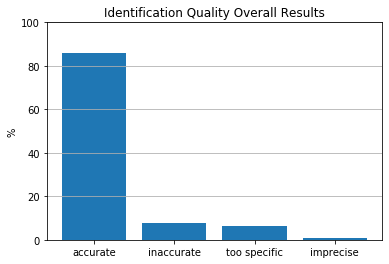

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
labels = ["accurate", "inaccurate", "too specific", "imprecise"]
data = [percent_accurate, percent_inaccurate, percent_too_specific, percent_imprecise]
plt.bar(labels, data)
plt.ylabel('%')
plt.title('Identification Quality Overall Results')
axes = plt.gca()
axes.set_ylim(0,100)
plt.grid(axis="y")
plt.show()
plt.close()

Let's break these down by "iconic taxon," e.g. higher-level taxonomic categories. First let's make sure we've actually got data in these categories. 

Text(0.5, 1.0, 'Total Expert Identifications By Iconic Taxon')

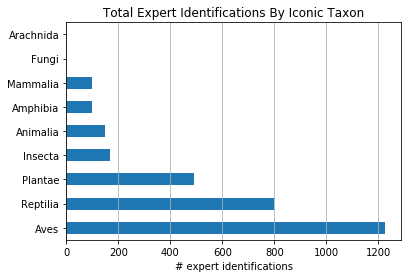

In [38]:
obs_was_confirmed['taxon_iconic_taxon_name'].value_counts().plot(kind="barh")
plt.xlabel('# expert identifications')
plt.grid(axis="x")
plt.title('Total Expert Identifications By Iconic Taxon')

Ok, so strongest in birds, basically nothing in fungi and arachnids, so we'll ignore those last two from now on. Now let's take a look at the results broken down by iconic taxon.

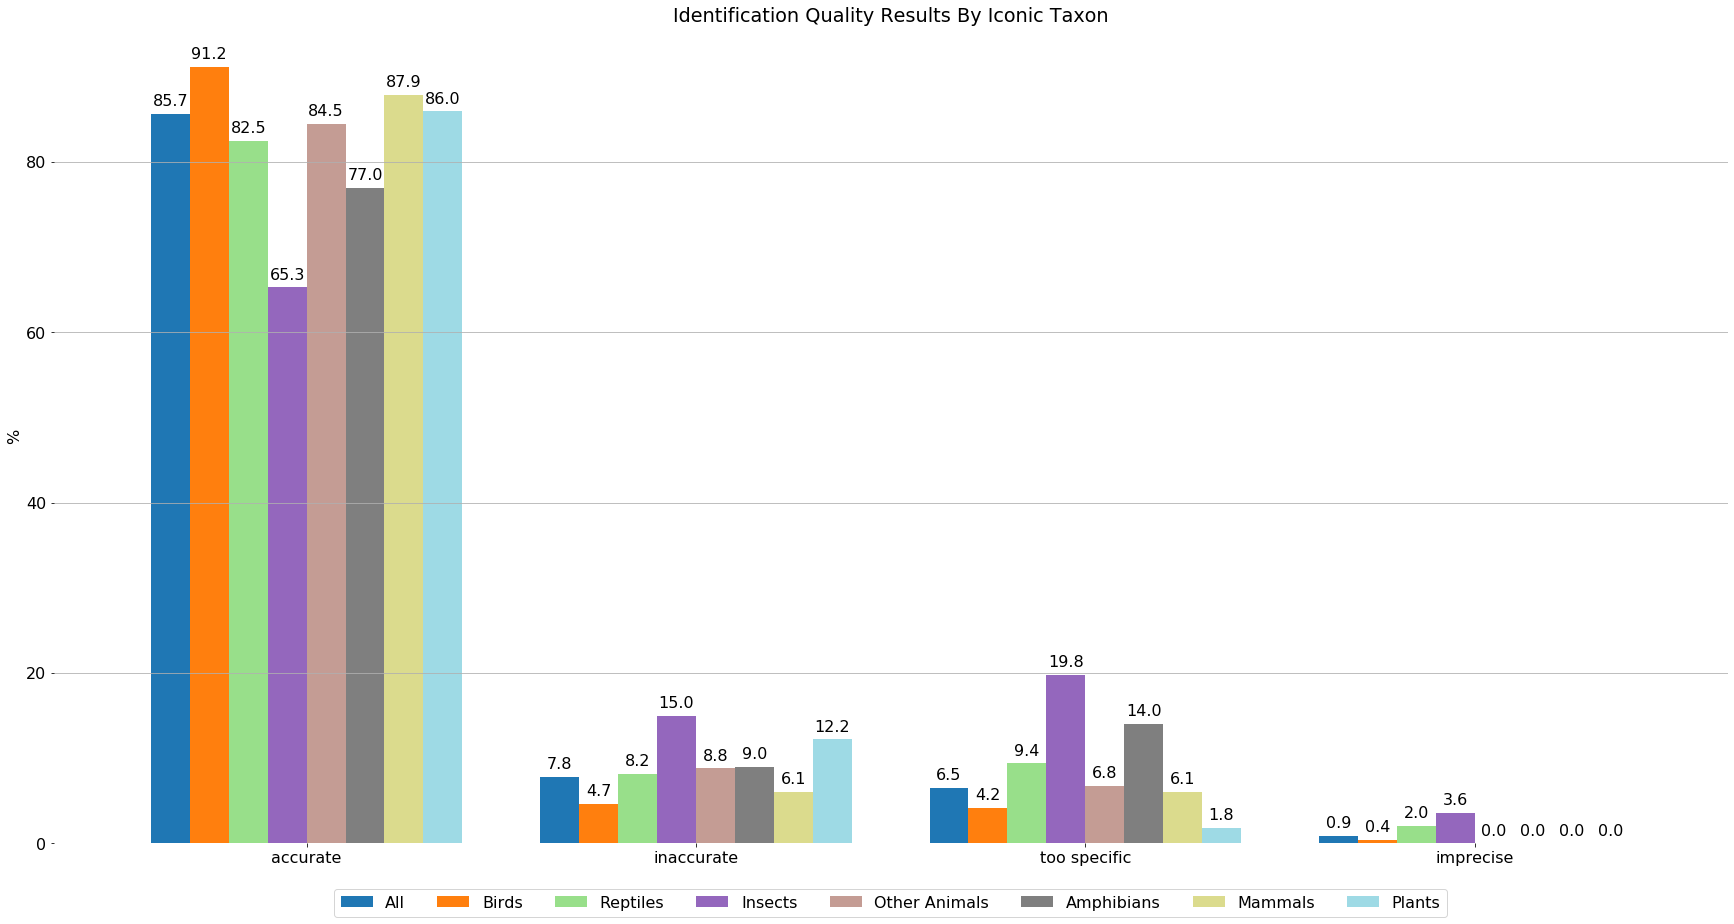

In [39]:
# Labeling method from https://stackoverflow.com/a/48372659
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.
def series_from_dataframe(df):
    total = len(df)
    more_conservative = len(df.loc[df['more_conservative']])
    disagreements = len(df.loc[df['disagreement']])
    exact_agreements = len(df.loc[df['exact_agreement']])
    more_specific_agreements = len(df.loc[df['more_specific_agreement']])
    percent_accurate = round((exact_agreements + more_specific_agreements ) / total * 100, 2)
    percent_inaccurate = round(disagreements / total * 100, 2)
    percent_too_specific = round(more_conservative / total * 100, 2)
    percent_imprecise = round(more_specific_agreements / total * 100, 2)
    return pd.Series([percent_accurate, percent_inaccurate, percent_too_specific, percent_imprecise])
series = series_from_dataframe(obs_was_confirmed)
df_by_iconic = pd.DataFrame({
    "All": series_from_dataframe(obs_was_confirmed),
    "Birds": series_from_dataframe(obs_was_confirmed.loc[obs_was_confirmed['taxon_iconic_taxon_name'] == 'Aves']),
    "Reptiles": series_from_dataframe(obs_was_confirmed.loc[obs_was_confirmed['taxon_iconic_taxon_name'] == 'Reptilia']),
    "Insects": series_from_dataframe(obs_was_confirmed.loc[obs_was_confirmed['taxon_iconic_taxon_name'] == 'Insecta']),
    "Other Animals": series_from_dataframe(obs_was_confirmed.loc[obs_was_confirmed['taxon_iconic_taxon_name'] == 'Animalia']),
    "Amphibians": series_from_dataframe(obs_was_confirmed.loc[obs_was_confirmed['taxon_iconic_taxon_name'] == 'Amphibia']),
    "Mammals": series_from_dataframe(obs_was_confirmed.loc[obs_was_confirmed['taxon_iconic_taxon_name'] == 'Mammalia']),
    "Plants": series_from_dataframe(obs_was_confirmed.loc[obs_was_confirmed['taxon_iconic_taxon_name'] == 'Plantae'])
})
plt.rcParams.update({'font.size': 16})
ax = df_by_iconic.plot(kind='bar', figsize=(30, 15), colormap="tab20", width=0.8)
ax.set_xticklabels(labels, rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
axes.set_ylim(0,100)
plt.grid(axis="y")
plt.ylabel('%')
plt.title('Identification Quality Results By Iconic Taxon')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(df_by_iconic.columns))
add_value_labels(ax)

So birds are the most accurate at 91.2% and the least inaccurate at 4.7%. Insects seem like the worst group, to the extent that that's meaningful given the diversity of insects and the small sample size. Interestingly, while experts seem to be more conservative than the community a lot of the time, it's still pretty small (max 20% for insects, which, again, isn't the fairest group to look at).